# Climate Coding Challenge

Climate change is impacting the way people live around the world

## There are more Earth Observation data online than any one person could ever look at

[NASA’s Earth Observing System Data and Information System (EOSDIS)
alone manages over 9PB of
data](https://www.earthdata.nasa.gov/learn/articles/getting-petabytes-people-how-eosdis-facilitates-earth-observing-data-discovery-and-use).
1 PB is roughly 100 times the entire Library of Congress (a good
approximation of all the books available in the US). It’s all available
to **you** once you learn how to download what you want.

Here we’re using the NOAA National Centers for Environmental Information
(NCEI) [Access Data
Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
application progamming interface (API) to request data from their web
servers. We will be using data collected as part of the Global
Historical Climatology Network daily (GHCNd) from their [Climate Data
Online library](https://www.ncdc.noaa.gov/cdo-web/datasets) program at
NOAA.

For this example we’re requesting [daily summary data in Karachi,
Pakistan (station ID
PKM00041780)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:PKM00041780/detail).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-response"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Research and cite your data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Research the <a
href="https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html"><strong>Global
Historical Climatology Network - Daily</strong></a> data source.</li>
<li>In the cell below, write a 2-3 sentence description of the data
source.</li>
<li>Include a citation of the data (<strong>HINT:</strong> See the ‘Data
Citation’ tab on the GHCNd overview page).</li>
</ol>
<p>Your description should include:</p>
<ul>
<li>who takes the data</li>
<li>where the data were taken</li>
<li>what the maximum temperature units are</li>
<li>how the data are collected</li>
</ul></div></div>

**YOUR DATA DESCRIPTION AND CITATION HERE** 🛎️

## Access NCEI GHCNd Data from the internet using its API 🖥️ 📡 🖥️

The cell below contains the URL for the data you will use in this part
of the notebook. We created this URL by generating what is called an
**API endpoint** using the NCEI [API
documentation](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation).

> **What’s an API?**
>
> An **application programming interface** (API) is a way for two or
> more computer programs or components to communicate with each other.
> It is a type of software interface, offering a service to other pieces
> of software ([Wikipedia](https://en.wikipedia.org/wiki/API)).

First things first – you will need to import the `earthpy` library to
help with data management and the `pandas` library to work with tabular
data:

In [1]:
# Import libraries
import holoviews as hv
import hvplot.pandas
import pandas as pd

The cell below contains the URL you will use to download climate data.
There are two things to notice about the URL code:

1.  It is surrounded by quotes – that means Python will interpret it as
    a `string`, or text, type, which makes sense for a URL.
2.  The URL is too long to display as one line on most screens. We’ve
    put parentheses around it so that we can easily split it into
    multiple lines by writing two strings – one on each line.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Format your URL for readability</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Pick an expressive variable name for the URL.</li>
<li>Reformat the URL so that it adheres to the <a
href="https://peps.python.org/pep-0008/#maximum-line-length">79-character
PEP-8 line limit</a>, and so that it is <strong>easy to read</strong>.
If you are using GitHub Codespaces, you should see two vertical lines in
each cell – don’t let your code go past the second line.</li>
<li>Replace ‘DATATYPE’, ‘STATION’, and the start and end dates
‘YYYY-MM-DD’, with the values for the data you want to download.</li>
</ol></div></div>

In [ ]:
atlanta_api = ('https://www.ncei.noaa.gov/access/services/data/v1?'
'dataset=daily-summaries&'
'dataTypes=SNOW,PRCP&'
'stations=US1GAFN0001'
'startDate=2009-03-28&'
'endDate=2025-07-20&'
'units=standard')
atlanta_api

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=SNOW,PRCP&stations=US1GAFT0024&startDate=2009-03-28&endDate=2025-07-20&units=standard'

In [2]:
fannin_api = ('https://www.ncei.noaa.gov/access/services/data/v1?'
'dataset=daily-summaries&'
'dataTypes=SNOW,PRCP&'
'stations=US1GAFN0001&'
'startDate=2008-06-21&'
'endDate=2025-08-03&'
'units=standard')
fannin_api

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=SNOW,PRCP&stations=US1GAFN0001&startDate=2008-06-21&endDate=2025-08-03&units=standard'

## Download and get started working with NCEI data

Go ahead and use `earthpy` to download data from your API URL. You could
also use Python, but using earthpy saves a file and lets you work
offline later on. If you didn’t already, you should import the `earthpy`
library **at the top of this notebook** so that others who want to use
your code can find it easily.

In [3]:
#SKIP THIS
# project = earthpy.Project(dirname=project_dirname)
# project.get_data(url=ncei_url, filename=ncei_filename)
# ncei_path = project.project_dir / ncei_filename

In [4]:
# Download the climate data
climate_df = pd.read_csv(
    atlanta_api,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
climate_df.head()

,STATION,PRCP,SNOW
DATE,,,
2009-03-28,US1GAFT0024,1.63,NaN
2009-03-29,US1GAFT0024,0.90,NaN
2009-03-30,US1GAFT0024,0.00,0.0
2009-03-31,US1GAFT0024,0.00,0.0
2009-04-01,US1GAFT0024,0.25,NaN


In [4]:
# Download the climate data
fannin_climate_df = pd.read_csv(
    fannin_api,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
fannin_climate_df.head()

,STATION,PRCP,SNOW
DATE,,,
2008-06-21,US1GAFN0001,0.00,0.0
2008-06-22,US1GAFN0001,0.57,0.0
2008-06-23,US1GAFN0001,0.00,0.0
2008-06-24,US1GAFN0001,0.43,0.0
2008-06-25,US1GAFN0001,0.00,0.0


<Axes: xlabel='DATE'>

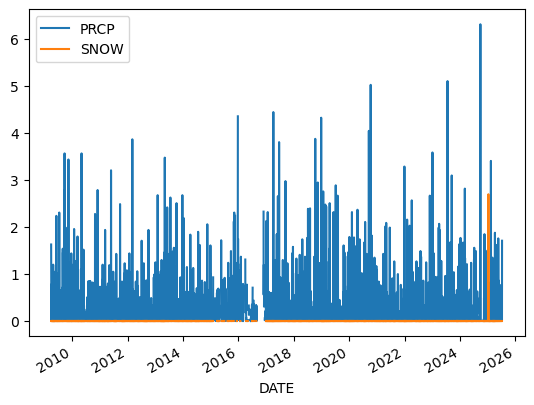

In [5]:
## Plot the precpitation column (PRCP) vs time to explore the data
climate_df.plot()

<Axes: xlabel='DATE'>

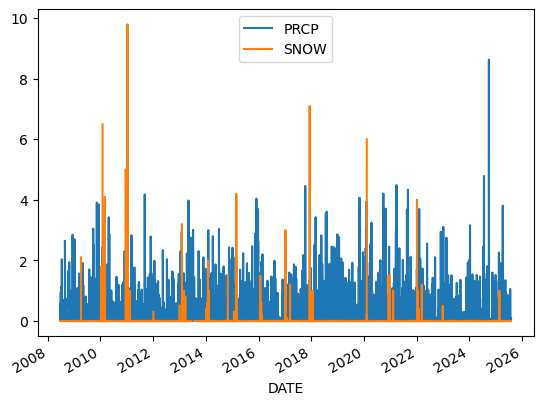

In [5]:
## Plot the precpitation column (PRCP) vs time to explore the data
fannin_climate_df.plot()

AttributeError: 'PlotAccessor' object has no attribute 'traverse'

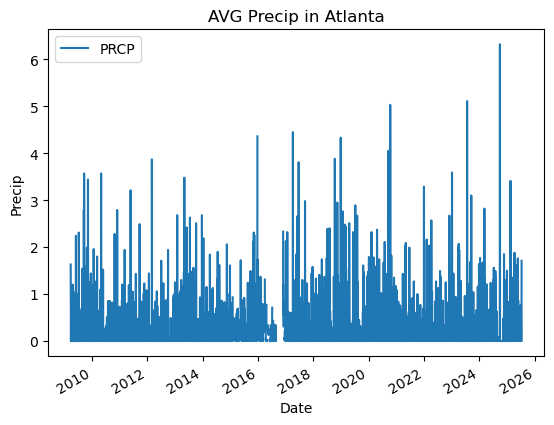

In [ ]:
# Plot the data using .plot
climate_df.plot(
    y='PRCP',
    title='AVG Precip in Atlanta',
    xlabel='Date',
    ylabel='Precip')


<Axes: title={'center': 'AVG Precip in Fannin County, Ga'}, xlabel='Date', ylabel='Precip'>

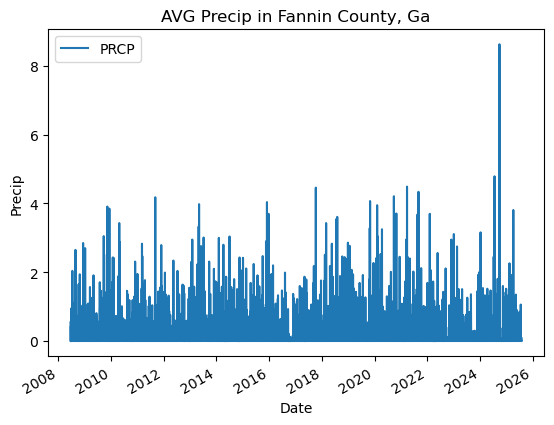

In [14]:
# Plot the data using .plot
fannin_climate_df.plot(
    y='PRCP',
    title='AVG Precip in Fannin County, Ga',
    xlabel='Date',
    ylabel='Precip')

In [ ]:
#Resample precip annually
annu_climate_df = climate_df.resample('YS').sum()
annu_climate_df

,STATION,PRCP,SNOW
DATE,,,
2009-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,60.61,0.0
2010-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,40.05,0.0
2011-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,39.47,0.0
2012-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,37.84,0.0
2013-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,61.36,0.0
2014-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,42.76,0.0
2015-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,60.15,0.0
2016-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,28.74,0.0
2017-01-01,US1GAFT0024US1GAFT0024US1GAFT0024US1GAFT0024US...,56.75,0.0


In [7]:
#Resample precip annually
annu_fannin_climate_df = fannin_climate_df.resample('YS').sum()
annu_fannin_climate_df

,STATION,PRCP,SNOW
DATE,,,
2008-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,33.54,0.0
2009-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,82.25,3.3
2010-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,58.02,25.8
2011-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,66.47,15.4
2012-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,51.57,0.8
2013-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,89.03,6.7
2014-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,66.27,7.4
2015-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,84.02,8.3
2016-01-01,US1GAFN0001US1GAFN0001US1GAFN0001US1GAFN0001US...,46.04,3.5


<Axes: xlabel='DATE'>

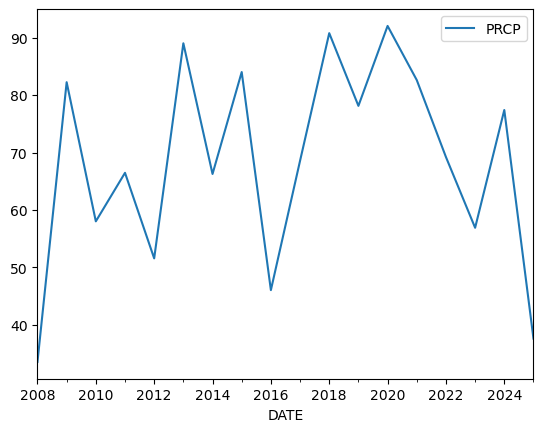

In [ ]:
# Plot the annual data
annu_climate_df.plot(y='PRCP')

<Axes: xlabel='DATE'>

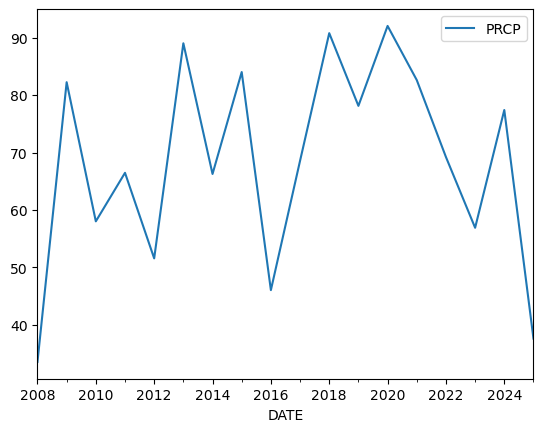

In [9]:
# Plot the annual data
annu_fannin_climate_df.plot(y='PRCP')

In [ ]:
# Plot the annual data interactively
annualsumclimate_plot = annu_climate_df.hvplot(y='PRCP')
annualsumclimate_plot

:Curve   [DATE]   (PRCP)

In [10]:
# Plot the annual data interactively
annualfanninsumclimate_plot = annu_fannin_climate_df.hvplot(y='PRCP')
annualfanninsumclimate_plot

:Curve   [DATE]   (PRCP)

In [15]:
hv.save(annualfanninsumclimate_plot, 'annualfanninsumclimate_plot.html')

In [ ]:
hv.save(annualsumclimate_plot, 'annualsumclimate_plot.html')

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [ ]:
%store atlanta_api annualsumclimate_plot

Stored 'atlanta_api' (str)
Stored 'annualsumclimate_plot' (Curve)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!